In [1]:
import os
import warnings

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
print(os.listdir("../nyc-taxi-trip-duration"))

['.DS_Store', 'weather_nyc_2016.csv', 'test.csv', 'kaggle_hugo_wind.ipynb', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']


In [55]:
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")

In [4]:
train.head(15)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255


In [5]:
len(train.index) == train.index.nunique()

True

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [7]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
index = train.index
index

Index(['id2875421', 'id2377394', 'id3858529', 'id3504673', 'id2181028',
       'id0801584', 'id1813257', 'id1324603', 'id1301050', 'id0012891',
       ...
       'id3445276', 'id3027038', 'id0405770', 'id1920898', 'id1454193',
       'id2376096', 'id1049543', 'id2304944', 'id2714485', 'id1209952'],
      dtype='object', name='id', length=1458644)

In [9]:
columns = train.columns
columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [10]:
values = train.values
values

array([[2, '2016-03-14 17:24:55', '2016-03-14 17:32:30', ...,
        40.765602111816406, 'N', 455],
       [1, '2016-06-12 00:43:35', '2016-06-12 00:54:38', ...,
        40.73115158081055, 'N', 663],
       [2, '2016-01-19 11:35:24', '2016-01-19 12:10:48', ...,
        40.71008682250977, 'N', 2124],
       ..., 
       [2, '2016-04-22 06:57:41', '2016-04-22 07:10:25', ...,
        40.70737075805664, 'N', 764],
       [1, '2016-01-05 15:56:26', '2016-01-05 16:02:39', ...,
        40.75710678100585, 'N', 373],
       [1, '2016-04-05 14:44:25', '2016-04-05 14:47:43', ...,
        40.79058456420898, 'N', 198]], dtype=object)

In [134]:
train['vendor_id'] = train.vendor_id.astype('category')
train['passenger_count'] = train.passenger_count.astype('category')
train['store_and_fwd_flag'] = train.store_and_fwd_flag.astype('category')

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1458644 non-null category
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null category
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null int64
dtypes: category(3), float64(4), int64(1), object(2)
memory usage: 93.2+ MB


# viz

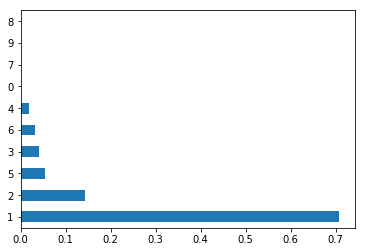

In [136]:
train['passenger_count'].value_counts(normalize=True).plot(kind="barh");

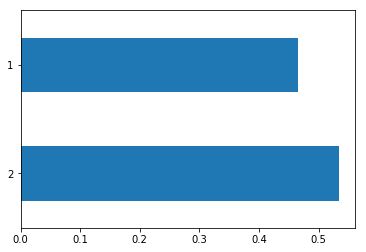

In [137]:
train['vendor_id'].value_counts(normalize=True).plot(kind="barh");

# cat columns

In [138]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
#train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [139]:
def extract_date_features(train, col):
   X = pd.DataFrame()
   """ Extract features from a date. """
   X['year'] = train[col].dt.year
   X['month'] = train[col].dt.month
   X['day'] = train[col].dt.day
   X['week_of_year'] = train[col].dt.week
   X['day_of_week'] = train[col].dt.dayofweek
   X['hour'] = train[col].dt.hour
   X['minute'] = train[col].dt.minute
   X['second'] = train[col].dt.second
   return X

In [140]:
pu_dt = extract_date_features(train, 'pickup_datetime')
pu_dt.head()

,year,month,day,week_of_year,day_of_week,hour,minute,second
id,,,,,,,,
id2875421,2016,3,14,11,0,17,24,55
id2377394,2016,6,12,23,6,0,43,35
id3858529,2016,1,19,3,1,11,35,24
id3504673,2016,4,6,14,2,19,32,31
id2181028,2016,3,26,12,5,13,30,55


In [141]:
#do_dt = extract_date_features(train, 'dropoff_datetime')
#do_dt.head()

In [142]:
pu_dt.shape

(1458644, 8)

In [143]:
train_2 = pd.concat([train, pu_dt], axis=1)
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 18 columns):
vendor_id             1458644 non-null category
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null category
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null int64
year                  1458644 non-null int64
month                 1458644 non-null int64
day                   1458644 non-null int64
week_of_year          1458644 non-null int64
day_of_week           1458644 non-null int64
hour                  1458644 non-null int64
minute                1458644 non-null int64
second                1458644 non-null int64
dtypes: category(3), datetime64[ns](1), float

In [144]:
weather = pd.read_csv("weather_nyc_2016.csv", parse_dates=['Time'])
weather.head(5)

,Time,Temp.,Windchill,Heat Index,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Events,Conditions
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast


In [145]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 14 columns):
Time          8787 non-null datetime64[ns]
Temp.         8787 non-null float64
Windchill     2295 non-null float64
Heat Index    815 non-null float64
Humidity      8787 non-null float64
Pressure      8556 non-null float64
Dew Point     8787 non-null float64
Visibility    8550 non-null float64
Wind Dir      8787 non-null object
Wind Speed    8787 non-null float64
Gust Speed    8787 non-null float64
Precip        8787 non-null float64
Events        8787 non-null object
Conditions    8787 non-null object
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 961.2+ KB


In [146]:
weather_filtered = weather.iloc[:, [0,1]]
weather_filtered['year'] = weather_filtered['Time'].dt.year
weather_filtered['month'] = weather_filtered['Time'].dt.month
weather_filtered['day'] = weather_filtered['Time'].dt.day
weather_filtered['hour'] = weather_filtered['Time'].dt.hour
weather_filtered = weather_filtered[weather_filtered['year'] == 2016]
weather_filtered.head(5)

,Time,Temp.,year,month,day,hour
22,2016-01-01 00:00:00,5.6,2016,1,1,0
23,2016-01-01 01:00:00,5.6,2016,1,1,1
24,2016-01-01 02:00:00,5.6,2016,1,1,2
25,2016-01-01 03:00:00,5.0,2016,1,1,3
26,2016-01-01 04:00:00,5.0,2016,1,1,4


In [147]:
train_3 = pd.merge(train_2, weather_filtered[['Temp.', 'month', 'day', 'hour']], on = ['month', 'day', 'hour'], how = 'left')

In [148]:
train_3.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,week_of_year,day_of_week,hour,minute,second,Temp.
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,11,0,17,24,55,4.4
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,23,6,0,43,35,28.9
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,3,1,11,35,24,-6.7
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,14,2,19,32,31,7.2
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,12,5,13,30,55,9.4
5,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016,1,30,4,5,22,1,40,3.9
6,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016,6,17,24,4,22,34,59,18.9
7,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016,5,21,20,5,7,54,58,13.9
8,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016,5,27,21,4,23,12,23,25.6
9,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016,3,10,10,3,21,45,1,23.9


## distance :

In [149]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(longitude1, latitude1, longitude2, latitude2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(latitude1)
    lon1 = radians(longitude1)
    lat2 = radians(latitude2)
    lon2 = radians(longitude2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # return distance in km
    return R * c

def add_distance(df):
    return df.apply(lambda row: calculate_distance(
        row.pickup_longitude,
        row.pickup_latitude,
        row.dropoff_longitude,
        row.dropoff_latitude
    ), axis=1)

train_3['distance'] = add_distance(train_3)

#df_test['distance'] = add_distance(df_test)

In [150]:
train_3.head(15)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,week_of_year,day_of_week,hour,minute,second,Temp.,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,11,0,17,24,55,4.4,1.498991
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,23,6,0,43,35,28.9,1.806074
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,3,1,11,35,24,-6.7,6.387103
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,14,2,19,32,31,7.2,1.485965
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,12,5,13,30,55,9.4,1.188962
5,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016,1,30,4,5,22,1,40,3.9,1.099287
6,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016,6,17,24,4,22,34,59,18.9,1.326695
7,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016,5,21,20,5,7,54,58,13.9,5.716775
8,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016,5,27,21,4,23,12,23,25.6,1.310765
9,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016,3,10,10,3,21,45,1,23.9,5.122769


In [151]:
train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
vendor_id             1458644 non-null category
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null category
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null int64
year                  1458644 non-null int64
month                 1458644 non-null int64
day                   1458644 non-null int64
week_of_year          1458644 non-null int64
day_of_week           1458644 non-null int64
hour                  1458644 non-null int64
minute                1458644 non-null int64
second                1458644 non-null int64
Temp.                 1446612 non-null float64
dis

In [160]:
y_train = train_3['trip_duration']
y_train.shape

(1458644,)

In [161]:
X_train = train_3.loc[:, train_3.columns != 'trip_duration']
X_train.shape

(1458644, 19)

In [170]:
train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
vendor_id             1458644 non-null category
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null category
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null int64
year                  1458644 non-null int64
month                 1458644 non-null int64
day                   1458644 non-null int64
week_of_year          1458644 non-null int64
day_of_week           1458644 non-null int64
hour                  1458644 non-null int64
minute                1458644 non-null int64
second                1458644 non-null int64
Temp.                 1446612 non-null float64
dis

In [216]:
SELECTED_COLUMNS = [
    'year',
    'month',
    'day',
    'day_of_week',
    'hour',
    'minute',
    'second',
    'distance'
]

In [217]:
f_X_train = train_3[SELECTED_COLUMNS]

In [218]:
f_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 8 columns):
year           1458644 non-null int64
month          1458644 non-null int64
day            1458644 non-null int64
day_of_week    1458644 non-null int64
hour           1458644 non-null int64
minute         1458644 non-null int64
second         1458644 non-null int64
distance       1458644 non-null float64
dtypes: float64(1), int64(7)
memory usage: 140.2 MB


# subset train set

In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [220]:
rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [221]:
sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(f_X_train, y_train)

In [222]:
cv_losses = -cross_val_score(rf, sub_X_train, sub_y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_log_error')

In [223]:
cv_losses

array([ 0.39708043,  0.39383408,  0.39597384,  0.40036167,  0.40578184])

In [224]:
rf.fit(f_X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [225]:
np.mean(cv_losses), np.std(cv_losses)

(0.3986063724754913, 0.0041617755399109739)

In [182]:
f_X_train

,passenger_count,year,month,day,day_of_week,hour,minute,second,Temp.,distance
0,1,2016,3,14,0,17,24,55,4.4,1.498991
1,1,2016,6,12,6,0,43,35,28.9,1.806074
2,1,2016,1,19,1,11,35,24,-6.7,6.387103
3,1,2016,4,6,2,19,32,31,7.2,1.485965
4,1,2016,3,26,5,13,30,55,9.4,1.188962
5,6,2016,1,30,5,22,1,40,3.9,1.099287
6,4,2016,6,17,4,22,34,59,18.9,1.326695
7,1,2016,5,21,5,7,54,58,13.9,5.716775
8,1,2016,5,27,4,23,12,23,25.6,1.310765
9,1,2016,3,10,3,21,45,1,23.9,5.122769


In [190]:
sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(X_train, y_train)

# pre processing on test set

In [56]:
test.head(15)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
id,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N


In [57]:
len(train.index) == train.index.nunique()

True

In [63]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000
mean,-73.973614,40.750927,-73.973458,40.751816
std,0.073389,0.029848,0.072565,0.035824
min,-121.933128,37.389587,-121.933327,36.601322
25%,-73.991852,40.737392,-73.991318,40.736000
50%,-73.981743,40.754093,-73.979774,40.754543
75%,-73.967400,40.768394,-73.963013,40.769852
max,-69.248917,42.814938,-67.496796,48.857597


In [64]:
test['vendor_id'] = test.vendor_id.astype('category')
test['passenger_count'] = test.passenger_count.astype('category')

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625134 entries, id3004672 to id0621643
Data columns (total 8 columns):
vendor_id             625134 non-null category
pickup_datetime       625134 non-null object
passenger_count       625134 non-null category
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: category(2), float64(4), object(2)
memory usage: 34.6+ MB


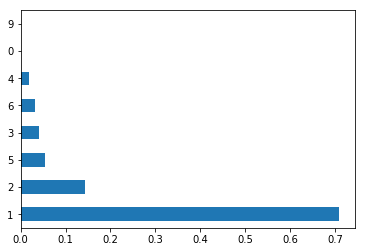

In [66]:
test['passenger_count'].value_counts(normalize=True).plot(kind="barh");

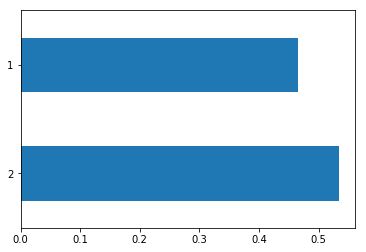

In [67]:
test['vendor_id'].value_counts(normalize=True).plot(kind="barh");

In [68]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [70]:
pu_dt_test = extract_date_features(test, 'pickup_datetime')
pu_dt_test.head()

,year,month,day,week_of_year,day_of_week,hour,minute,second
id,,,,,,,,
id3004672,2016,6,30,26,3,23,59,58
id3505355,2016,6,30,26,3,23,59,53
id1217141,2016,6,30,26,3,23,59,47
id2150126,2016,6,30,26,3,23,59,41
id1598245,2016,6,30,26,3,23,59,33


In [73]:
test_2 = pd.concat([test, pu_dt_test], axis=1)
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625134 entries, id3004672 to id0621643
Data columns (total 16 columns):
vendor_id             625134 non-null category
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null category
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
year                  625134 non-null int64
month                 625134 non-null int64
day                   625134 non-null int64
week_of_year          625134 non-null int64
day_of_week           625134 non-null int64
hour                  625134 non-null int64
minute                625134 non-null int64
second                625134 non-null int64
dtypes: category(2), datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 72.7+ MB


In [74]:
test_2.head(5)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,week_of_year,day_of_week,hour,minute,second
id,,,,,,,,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016,6,30,26,3,23,59,58
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016,6,30,26,3,23,59,53
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016,6,30,26,3,23,59,47
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016,6,30,26,3,23,59,41
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016,6,30,26,3,23,59,33


In [72]:
weather.head(5)

,Time,Temp.,Windchill,Heat Index,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Events,Conditions
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast


In [75]:
test_3 = pd.merge(test_2, weather_filtered[['Temp.', 'Conditions','month', 'day', 'hour']], on = ['month', 'day', 'hour'], how = 'left')

In [76]:
test_3.head(5)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,week_of_year,day_of_week,hour,minute,second,Temp.,Conditions
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016,6,30,26,3,23,59,58,24.4,Clear
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016,6,30,26,3,23,59,53,24.4,Clear
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016,6,30,26,3,23,59,47,24.4,Clear
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016,6,30,26,3,23,59,41,24.4,Clear
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016,6,30,26,3,23,59,33,24.4,Clear


In [209]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(longitude1, latitude1, longitude2, latitude2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(latitude1)
    lon1 = radians(longitude1)
    lat2 = radians(latitude2)
    lon2 = radians(longitude2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # return distance in km
    return R * c

def add_distance(df):
    return df.apply(lambda row: calculate_distance(
        row.pickup_longitude,
        row.pickup_latitude,
        row.dropoff_longitude,
        row.dropoff_latitude
    ), axis=1)

test_3['distance'] = add_distance(test_3)

#df_test['distance'] = add_distance(df_test)

In [226]:
f_X_test = test_3[SELECTED_COLUMNS]

In [227]:
f_X_test.head(5)

,year,month,day,day_of_week,hour,minute,second,distance
0,2016,6,30,3,23,59,58,2.747288
1,2016,6,30,3,23,59,53,2.760105
2,2016,6,30,3,23,59,47,1.306565
3,2016,6,30,3,23,59,41,5.270742
4,2016,6,30,3,23,59,33,0.961143


In [228]:
y_hat = rf.predict(f_X_test)

In [229]:
np.mean(y_hat)

1025.9731681527483

In [232]:
result = pd.DataFrame(y_hat).to_csv("result.csv")